# Importation

In [87]:
from sklearn.datasets import load_digits
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load the dataset and preprocessing

In [88]:
#load digits
digits = load_digits()

#create the variables
images = digits['images']
images= images.reshape(-1, 64)
targets = digits['target']

#print shape 
print(images.shape)
print(targets.shape)

#standardscaler
scaler =StandardScaler()
scaler.fit_transform(images)

#train test split
img_train , img_test, targets_train, targets_test = train_test_split(images, targets, test_size=.2)
print(img_train.shape, img_test.shape)
print(targets.shape, targets_test.shape)

(1797, 64)
(1797,)
(1437, 64) (360, 64)
(1797,) (360,)


# Modeling

In [89]:
#flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[8,8]))

#create the layers
model.add(tf.keras.layers.Dense(256 , input_dim= 64,activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [90]:
prediction = model(img_train[0:1])
print(prediction , targets_train[0:1])

tf.Tensor(
[[2.1512067e-01 1.8146307e-03 1.6382693e-03 4.6884568e-05 2.3639216e-06
  7.7763563e-01 2.6526465e-03 2.3727052e-06 2.0368739e-04 8.8285928e-04]], shape=(1, 10), dtype=float32) [2]


# the summary of model

In [91]:
print(model.summary())

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 256)               16640     
                                                                 
 dense_62 (Dense)            (None, 128)               32896     
                                                                 
 dense_63 (Dense)            (None, 10)                1290      
                                                                 
Total params: 50,826
Trainable params: 50,826
Non-trainable params: 0
_________________________________________________________________
None


# compile the model

In [92]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

# fit the model

In [93]:
history = model.fit(img_train, targets_train, epochs=50, validation_split=.2)

Epoch 1/50
36/36 [==============================] - 1s 9ms/step - loss: 1.2263 - accuracy: 0.7006 - val_loss: 0.3750 - val_accuracy: 0.8854
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 0.2481 - accuracy: 0.9391 - val_loss: 0.3373 - val_accuracy: 0.8819
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9608 - val_loss: 0.2257 - val_accuracy: 0.9410
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9704 - val_loss: 0.1880 - val_accuracy: 0.9410
Epoch 5/50
36/36 [==============================] - 0s 4ms/step - loss: 0.1053 - accuracy: 0.9782 - val_loss: 0.1774 - val_accuracy: 0.9410
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9843 - val_loss: 0.1675 - val_accuracy: 0.9514
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9887 - val_loss: 0.1800 - val_accuracy: 0.9479
Epoch 8/50
36/36 [==

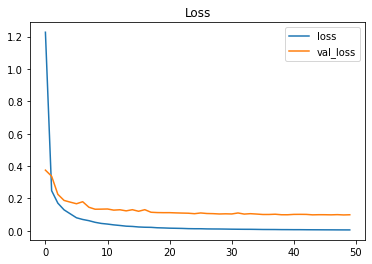

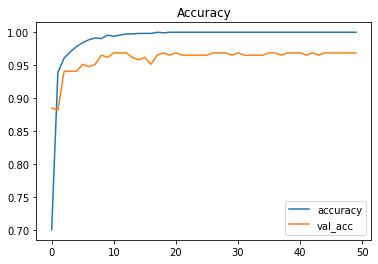

In [94]:
#loss
loss = history.history['loss']
loss_val = history.history['val_loss']

#accuracy
accuracy = history.history['accuracy']
acc_val = history.history['val_accuracy']

#visulalization
plt.figure()
plt.plot(loss, label = 'loss')
plt.plot(loss_val, label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(accuracy, label = 'accuracy')
plt.plot(acc_val , label = 'val_acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [101]:
output = model(img_test[0:1])
print('prediction: ',output, '\nsoit', np.argmax(output),  ' \ntargets:',targets_test[0:1])

prediction:  tf.Tensor(
[[4.1324878e-07 9.6202733e-08 8.0659100e-07 2.1928670e-05 2.9354635e-07
  7.7084792e-08 5.4556981e-10 9.9995887e-01 2.1934347e-06 1.5328562e-05]], shape=(1, 10), dtype=float32) 
soit 7  
targets: [7]
